<img src="https://www.wired.com/images_blogs/gamelife/2010/05/pacman10_gameplay-highres.png"  />

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [188]:
data = glob.glob(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\1\DIP_HW1\inputs\P4\*.png')
    
monsters = []
names=[]

for image in data:
    name = image.split('\\')[-1][:-4]
    if name == 'maze':
        maze = cv2.imread(image)
        maze = cv2.cvtColor(maze, cv2.COLOR_BGR2RGB)
            
    else:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        monsters.append(img)    
        names.append(name)


In [189]:
maze.shape

(248, 192, 3)

In [190]:
def get_position(maze, dot, pellet):
    
    
    dots_positions = []
    pellet_positions = []
    margin = pellet.shape[0]
    extended_dot = np.zeros(np.add(dot.shape, (2, 2, 0))).astype(np.uint8)
    extended_dot[1:-1, 1:-1] = dot
    
    
    for i in range(margin, maze.shape[0] - margin):
        for j in range(margin, maze.shape[1] - margin):
            if (maze[i - 1:i + dot.shape[0] + 1, j - 2:j + dot.shape[1]] == extended_dot).all():
                dots_positions.append((i, j))
            
            if (maze[i:i + pellet.shape[0], j - 2:j + pellet.shape[1] - 2] == pellet).all():
                pellet_positions.append((i, j))
    
    return dots_positions, pellet_positions



In [191]:
def init_game(maze, monsters, names):
    maze = maze.copy()
    dots_pos, power_pellet_pos = get_position(maze, monsters[names.index('dot')], 
                                                   monsters[names.index('power_pellet')])
    
    idxs = np.random.choice(np.array(range(len(dots_pos))), 5, replace=False)
    rand_positions = np.array(dots_pos)[idxs]
    
    
    pacman_closed = monsters[names.index('pacman_closed')]
    height, width = rand_positions[0][0], rand_positions[0][1]
    maze[height - 8: height + 7, width - 6: width + 7] = pacman_closed
        
    blinky_move1_down = monsters[names.index('blinky_move1_down')]
    height, width = rand_positions[1][0], rand_positions[1][1]
    maze[height - 6: height + 10, width - 7: width + 7] = blinky_move1_down
    
    clyde_move1_left = monsters[names.index('clyde_move1_left')]
    height, width = rand_positions[2][0], rand_positions[2][1]
    maze[height - 6: height + 10, width - 7: width + 7] = clyde_move1_left
    
    inky_move1_left = monsters[names.index('inky_move1_right')]
    height, width = rand_positions[3][0], rand_positions[3][1]
    maze[height - 6: height + 10, width - 7: width + 7] = inky_move1_left
    
    pinky_move1_up = monsters[names.index('pinky_move1_up')]
    height, width = rand_positions[4][0], rand_positions[4][1]
    maze[height - 6: height + 10, width - 7: width + 7] = pinky_move1_up
    
    return maze, rand_positions, dots_pos




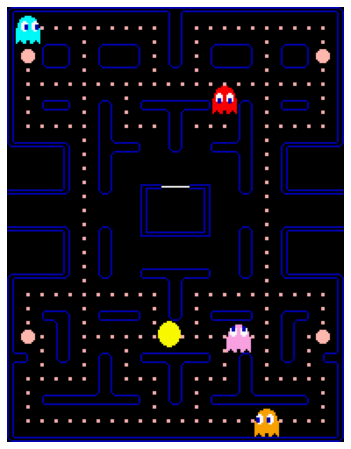

In [192]:
game_img, char_positions, dots_pos = init_game(maze, monsters, names)

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(game_img)

In [193]:
np.zeros(img.shape)
def game(maze, monsters, names, char_positions, dots_pos, directions, mouth, legs):
    
    dot = monsters[names.index('dot')]
    
    pacman_open_down   = monsters[names.index('pacman_open_down')]
    pacman_open_left   = monsters[names.index('pacman_open_left')]
    pacman_open_right  = monsters[names.index('pacman_open_right')]
    pacman_open_up     = monsters[names.index('pacman_open_up')]
    pacman_half_left   = monsters[names.index('pacman_half_left')]
    pacman_half_right  = monsters[names.index('pacman_half_right')]
    pacman_closed   = monsters[names.index('pacman_closed')]
    pacman_half_down   = monsters[names.index('pacman_half_down')]
    pacman_half_up     = monsters[names.index('pacman_half_up')]

    
    height = char_positions[0][0]
    width= char_positions[0][1]
    
    for point in dots_pos:
        maze[point[0]: point[0] + 2, point[1] - 1: point[1] + 1] = np.zeros(dot.shape)
        maze[point[0]: point[0] + 2, point[1] - 1: point[1] + 1] = dot

    if directions[0] == 'down':
        if not np.array_equal(maze[height + 6 + 4, width - 6], [0, 0, 184]) and not np.array_equal(maze[height + 6 + 4, width + 6], [0, 0, 184]):
            maze[height -8 : height + 7, width - 6: width + 7] = np.zeros(pacman_closed.shape)
            if (height, width) in dots_pos:
                maze[height - 4 + 2: height + 7 + 2, width - 6: width + 7] = pacman_open_down
                dots_pos.remove((height, width))
                
            else:
                if mouth % 2 == 0:
                    maze[height - 6 + 1: height + 7 + 2, width - 6: width + 7] = pacman_half_down
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    maze[height - 8 + 2: height + 7 + 2, width - 6: width + 7] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height + 2, width])
        else:
            directions[0] = np.random.choice(['up','right', 'left'])

    elif directions[0] == 'left':
        if not np.array_equal(maze[height - 6, width - 6 - 3], [0, 0, 184]) and not np.array_equal(maze[height + 6, width - 6 - 3], [0, 0, 184]):
            maze[height - 8: height + 7, width - 6: width + 7] = np.zeros(pacman_closed.shape)
            if (height, width) in dots_pos:
                maze[height - 8: height + 7, width - 6 : width + 7 - 2] = pacman_open_left
                dots_pos.remove((height, width))
                
            else:
                if mouth % 2 == 0:
                    maze[height - 8: height + 7, width - 6 - 1: width + 7 - 2] = pacman_half_left
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    maze[height - 8: height + 7, width - 6 - 2: width + 7 - 2] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height, width - 2])
        else:
            directions[0] = np.random.choice(['up', 'right', 'down' ])
            
    elif directions[0] == 'up':
        if not np.array_equal(maze[height - 6 - 3, width - 6], [0, 0, 184]) and not np.array_equal(maze[height - 6 - 3, width + 6], [0, 0, 184]):
            maze[height -8: height + 7, width - 6: width + 7] = np.zeros(pacman_closed.shape)

            if (height, width) in dots_pos:
                maze[height - 6 : height + 7 - 2, width - 6: width + 7] = pacman_open_up
                dots_pos.remove((height, width))
                mouth = 0
            else:
                if mouth % 2 == 0:
                    maze[height - 6 - 3: height + 7 - 2, width - 6: width + 7] = pacman_half_up
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    maze[height - 8 - 2: height + 7 - 2, width - 6: width + 7] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height - 2, width])
        else:
            directions[0] = np.random.choice(['down', 'right', 'left'])
            
            
    elif directions[0] == 'right':
        if not np.array_equal(maze[height - 6, width + 6 + 2], [0, 0, 184]) and not np.array_equal(maze[height + 6, width + 6 + 2], [0, 0, 184]):
            maze[height - 8: height + 7, width - 6: width + 7] = np.zeros(pacman_closed.shape)
            if (height, width) in dots_pos:
                maze[height - 8: height + 7, width - 4 + 2: width + 7 + 2] = pacman_open_right
                dots_pos.remove((height, width))
                
            else:
                if mouth % 2 == 0:
                    maze[height - 8: height + 7, width - 5 + 2: width + 7 + 2] = pacman_half_right
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    maze[height - 8: height + 7, width - 6 + 2: width + 7 + 2] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height, width + 2])
        else:
            directions[0] = np.random.choice(['up', 'down', 'left'])
            
            


        
    # Ghosts
        
    blinky = []
    blinky.append(monsters[names.index('blinky_move1_down')])
    blinky.append(monsters[names.index('blinky_move1_left')])
    blinky.append(monsters[names.index('blinky_move1_right')])
    blinky.append(monsters[names.index('blinky_move1_up')])
    blinky.append(monsters[names.index('blinky_move2_down')])
    blinky.append(monsters[names.index('blinky_move2_left')])
    blinky.append(monsters[names.index('blinky_move2_right')])
    blinky.append(monsters[names.index('blinky_move2_up')])
    
    clyde = []
    clyde.append(monsters[names.index('clyde_move1_down')])
    clyde.append(monsters[names.index('clyde_move1_left')])
    clyde.append(monsters[names.index('clyde_move1_right')])
    clyde.append(monsters[names.index('clyde_move1_up')])
    clyde.append(monsters[names.index('clyde_move2_down')])
    clyde.append(monsters[names.index('clyde_move2_left')])
    clyde.append(monsters[names.index('clyde_move2_right')])
    clyde.append(monsters[names.index('clyde_move2_up')])
    
    inky = []
    inky.append(monsters[names.index('inky_move1_down')])
    inky.append(monsters[names.index('inky_move1_left')])
    inky.append(monsters[names.index('inky_move1_right')])
    inky.append(monsters[names.index('inky_move1_up')])
    inky.append(monsters[names.index('inky_move2_down')])
    inky.append(monsters[names.index('inky_move2_left')])
    inky.append(monsters[names.index('inky_move2_right')])
    inky.append(monsters[names.index('inky_move2_up')])
    
    pinky = []
    pinky.append(monsters[names.index('pinky_move1_down')])
    pinky.append(monsters[names.index('pinky_move1_left')])
    pinky.append(monsters[names.index('pinky_move1_right')])
    pinky.append(monsters[names.index('pinky_move1_up')])
    pinky.append(monsters[names.index('pinky_move2_down')])
    pinky.append(monsters[names.index('pinky_move2_left')])
    pinky.append(monsters[names.index('pinky_move2_right')])
    pinky.append(monsters[names.index('pinky_move2_up')])
    
    ghosts = []
    ghosts.append(blinky)
    ghosts.append(clyde)
    ghosts.append(inky)
    ghosts.append(pinky)
        
    for i, ghost in enumerate(ghosts):
        
        height, width = char_positions[i + 1][0], char_positions[i + 1][1]

        if directions[i + 1] == 'down':
            if not np.array_equal(maze[height + 9 + 1, width - 6], [0, 0, 184]) and not np.array_equal(maze[height + 9 + 1, width + 6], [0, 0, 184]):
                maze[height - 6: height + 10, width - 7: width + 7] = np.zeros(ghost[0].shape)

                if legs % 4 in [0, 1]:
                    maze[height - 6 + 2: height + 10 + 2, width - 7: width + 7] = ghost[0]

                elif legs % 4 in [2, 3]:
                    maze[height - 6 + 2: height + 10 + 2, width - 7: width + 7] = ghost[4]
                
                char_positions[i + 1] = np.array([height + 2, width])
            else:
                directions[i + 1] = np.random.choice(['up', 'left', 'right'])
            
        
        elif directions[i + 1] == 'left':
            if not np.array_equal(maze[height - 5, width - 7 - 2], [0, 0, 184]) and not np.array_equal(maze[height + 5, width - 7 - 2], [0, 0, 184]):
                maze[height - 6: height + 10, width - 7: width + 7] = np.zeros(ghost[0].shape)

                if legs % 4 in [0, 1]:
                    maze[height - 6: height + 10, width - 7 - 2: width + 7 - 2] = ghost[1]

                elif legs % 4 in [2, 3]:
                    maze[height - 6: height + 10, width - 7 - 2: width + 7 - 2] = ghost[5]
                
                char_positions[i + 1] = np.array([height, width - 2])
            else:
                directions[i + 1] = np.random.choice(['down', 'up', 'right'])
                
                
        elif directions[i + 1] == 'up':
            if not np.array_equal(maze[height - 6 - 3, width - 6], [0, 0, 184]) and not np.array_equal(maze[height - 6 - 3, width + 6], [0, 0, 184]):
                maze[height -6: height + 10, width - 7: width + 7] = np.zeros(ghost[0].shape)

                if legs % 4 in [0, 1]:
                    maze[height - 6 - 2: height + 10 - 2, width - 7: width + 7] = ghost[3]

                elif legs % 4 in [2, 3]:
                    maze[height - 6 - 2: height + 10 - 2, width - 7: width + 7] = ghost[7]
                
                char_positions[i + 1] = np.array([height - 2, width])
            else:
                directions[i + 1] = np.random.choice(['down', 'left', 'right'])
        
        
        elif directions[i + 1] == 'right':
            if not np.array_equal(maze[height - 5, width + 6 + 2], [0, 0, 184]) and not np.array_equal(maze[height + 5, width + 6 + 2], [0, 0, 184]):
                maze[height - 6: height + 10, width - 7: width + 7] = np.zeros(ghost[0].shape)

                if legs % 4 in [0, 1]:
                    maze[height - 6: height + 10, width - 7 + 2: width + 7 + 2] = ghost[2]

                elif legs % 4 in [2, 3]:
                    maze[height - 6: height + 10, width - 7 + 2: width + 7 + 2] = ghost[6]
                
                char_positions[i + 1] = np.array([height, width + 2])
            else:
                directions[i + 1] = np.random.choice(['up', 'down', 'left'])
                
        

                
    # Checking for Game Over
    game_over = False
    pac_man_pos = char_positions[0]
    for pos in char_positions[1:]:
        if np.abs(pos[0] - pac_man_pos[0]) + np.abs(pos[1] - pac_man_pos[1]) < 12:
            game_over = True
        
            
    legs += 1    
    return maze, char_positions, directions, mouth, legs, game_over

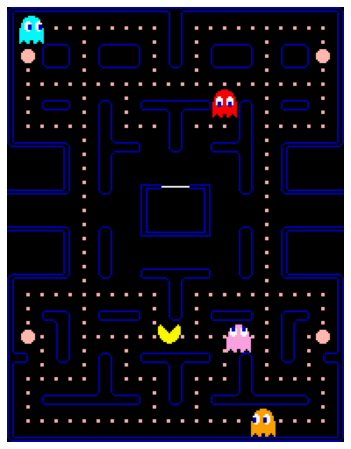

In [194]:
mouth, legs = 0, 0
frames = []
frames.append(game_img.copy())
directions = ['up', 'down', 'left', 'right', 'up']
next_game_img, char_positions, directions, mouth, legs, game_over = game(game_img, monsters, names, char_positions, dots_pos, directions, mouth, legs)
frames.append(next_game_img.copy())
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(next_game_img)

In [195]:
while game_over == False:
    next_game_img, char_positions, directions, mouth, legs, game_over = game(next_game_img, monsters, names, char_positions, dots_pos, directions, mouth, legs)
    frames.append(next_game_img.copy())

print('Game Over')


Game Over


In [196]:
out = cv2.VideoWriter('./PocManVideo.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (maze.shape[1], maze.shape[0]))
 
for frame in frames:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

cv2.destroyAllWindows()    
out.release()

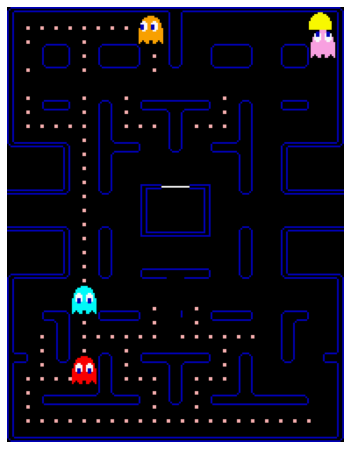

In [197]:
final_state = frames[-1]
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(final_state)

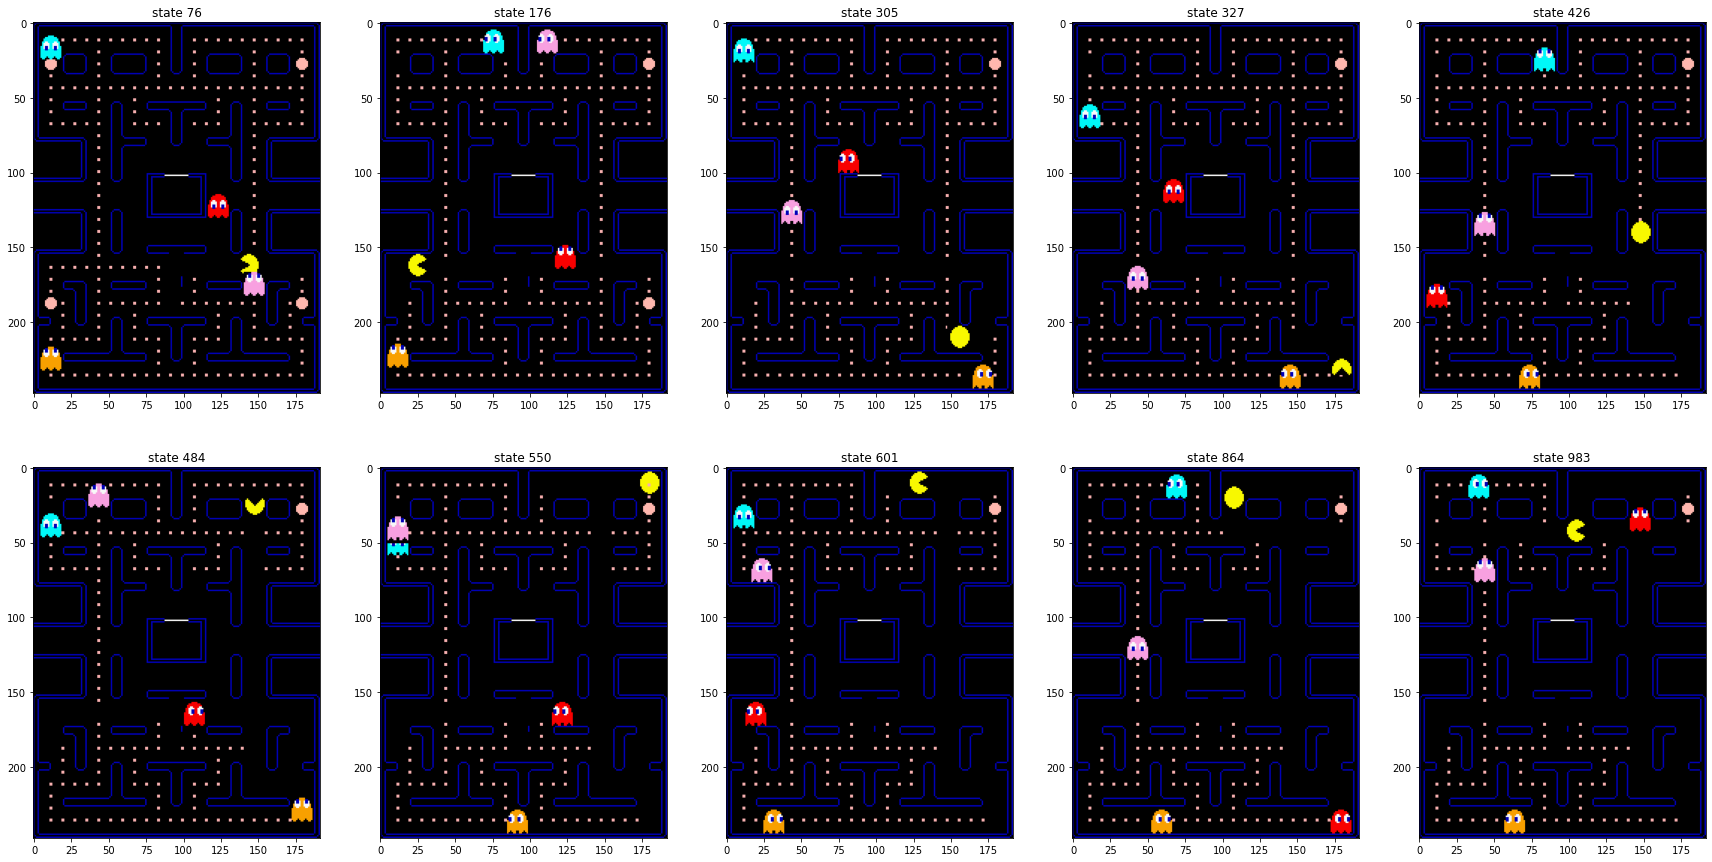

In [198]:
game_images = np.random.choice(len(frames) , 10, replace=False)
game_images = np.sort(game_images)
states = np.array(frames)[game_images]
fig, ax = plt.subplots(2, 5, figsize=(30, 15))
for state, idx, ax in zip(states, game_images, fig.axes):
    ax.imshow(state)
    ax.set_title('state {}'.format(idx))